# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.366976e+01     1.388202e+01
 * time: 0.0042040348052978516
     1     6.241416e+01     1.259127e+01
 * time: 0.01218104362487793
     2     5.642763e+01     1.873294e+01
 * time: 0.03204202651977539
     3     4.118189e+01     1.298651e+01
 * time: 0.060951948165893555
     4     3.261280e+01     1.167381e+01
 * time: 0.0877981185913086
     5     1.405612e+01     2.547293e+00
 * time: 0.11737704277038574
     6     1.029267e+01     2.609013e+00
 * time: 0.13709092140197754
     7     9.126809e+00     2.444832e+00
 * time: 0.15665698051452637
     8     8.256907e+00     2.578139e+00
 * time: 0.27396702766418457
     9     7.463554e+00     1.468112e+00
 * time: 0.2930450439453125
    10     6.936064e+00     3.104424e+00
 * time: 0.30903005599975586
    11     6.500365e+00     2.172129e+00
 * time: 0.32418394088745117
    12     6.140338e+00     1.223845e+00
 * time: 0.3397531509399414
    13     5.937483e+00     1.173137e+00
 * time:

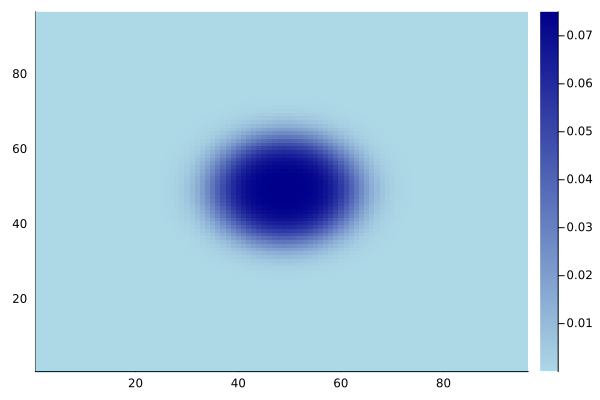

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)